<a href="https://colab.research.google.com/github/VitorGama10/Avan-ando_Machine_Learning_/blob/main/Machine_Learning__lidando_com_dados_de_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dados


In [413]:
import pandas as pd 

dados = pd.read_csv('exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


# Analisando valores nulos 

In [414]:
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

## Selecionando os dados 

### Separando treino de teste

In [415]:
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random

# Separando os dados para treino e teste
valores_exames = dados.drop(['id', 'diagnostico'], axis = 1)

# Para teste
diagnostico = dados.diagnostico

# Exclui a variavel que tem bastante valores nulos 
valores_exames_v1 =  valores_exames.drop(['exame_33'], axis = 1)


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.2, random_state=101)

In [416]:
teste_y.head()

107    B
437    B
195    B
141    M
319    B
Name: diagnostico, dtype: object

# Selecionando o modelo

### Resultado da classificação 

In [417]:
from sklearn.ensemble import RandomForestClassifier # Imprime varias arvores de decisao 


modelo = RandomForestClassifier(n_estimators=100) # 100 arvores de decisão
modelo.fit(treino_x, treino_y)

print('Resultado da Classificação %.2f%%' %(modelo.score(teste_x, teste_y)*100)) # score ja vai trazer minha acuracia

Resultado da Classificação 97.37%


# Selecioando outro modelo

In [418]:
from sklearn.dummy import DummyClassifier

SEED = 101
np.random.seed(SEED)

modelo_bobo = DummyClassifier(strategy = 'most_frequent')

modelo_bobo.fit(treino_x, treino_y)

print('Resultado da Classificação boba %.2f%%' %(modelo_bobo.score(teste_x, teste_y)*100))

Resultado da Classificação boba 63.16%


## Selecioando o StandardScaler

In [419]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

valores_exames_v2 = padronizador.transform(valores_exames_v1)

valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

# Colocou em dataframe pq o outro de baixo é dataframe

In [420]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot.head(1)

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515


## pd.melt ----> vacilitou a analise grafica

In [421]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


# Analise grafica --> violinplot 

### Observamos valores constantes

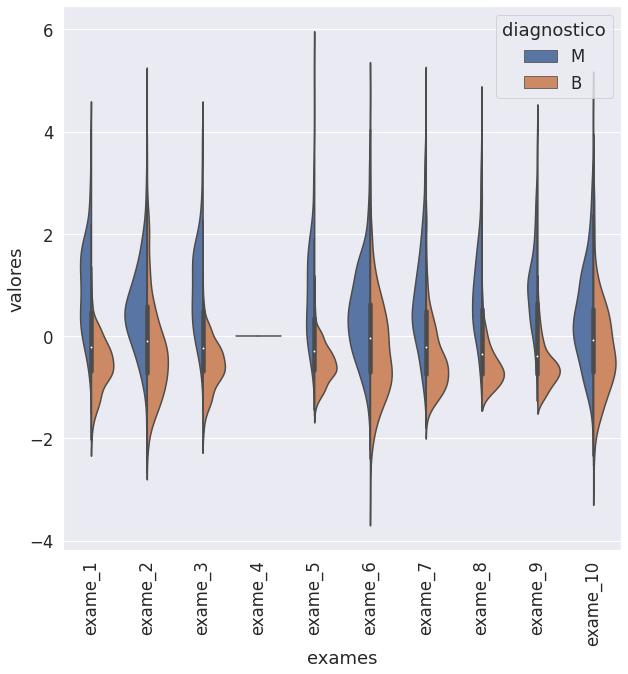

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
ax = sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

plt.xticks(rotation = 90)
ax = ax

# tem valores constantes e podemos eliminar essa variavel

# Fizemos uma função 
Escolhemos do 10 a 20 exames 

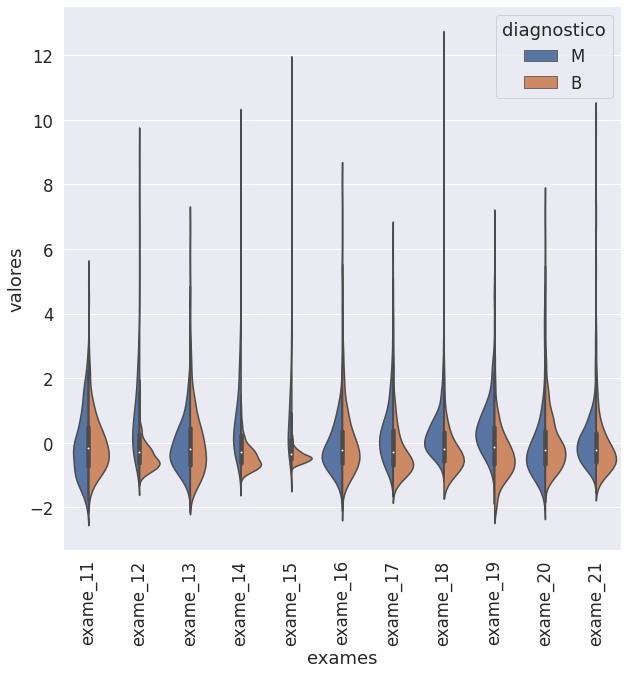

In [423]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot.head(1)

  dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name = 'exames', value_name = 'valores')
  dados_plot.head()



  plt.figure(figsize =(10,10))
  ax = sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

  plt.xticks(rotation = 90)
  ax = ax

grafico_violino(valores_exames_v2, 10, 21) # do exame 10 ao 21


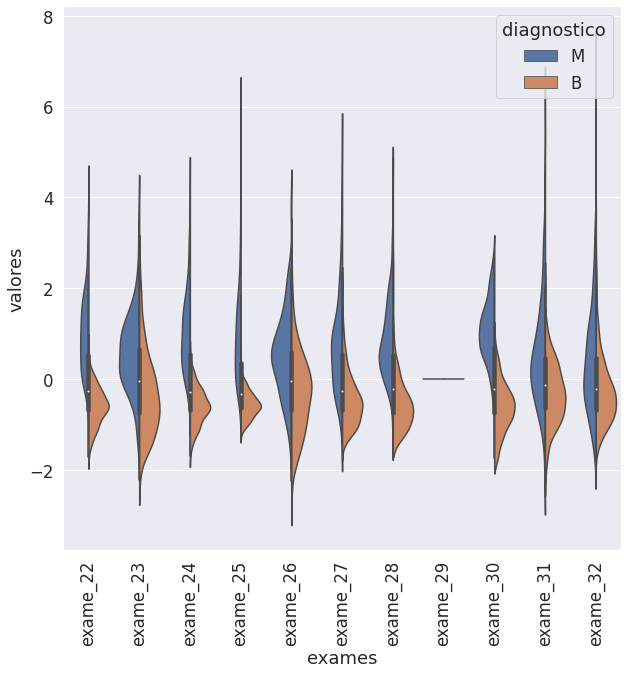

In [424]:
grafico_violino(valores_exames_v2, 21, 32) # do exame 22 ao 32

### Excluindo a variavel constante 

In [425]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_29', 'exame_4'])

## Função para o resultado da classificação 

In [426]:
def classificar(valores):
  
 treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico, test_size = 0.3, random_state=101)
 
 modelo = RandomForestClassifier(n_estimators=100) # 100 arvores de decisão
 modelo.fit(treino_x, treino_y)

 print('Resultado da Classificação %.2f%%' %(modelo.score(teste_x, teste_y)*100)) # score ja vai trazer minha acuracia

classificar(valores_exames_v3)

Resultado da Classificação 95.32%


## Correlação das variaveis

para excluir e observa a variavel que mais significa para nosso resultado

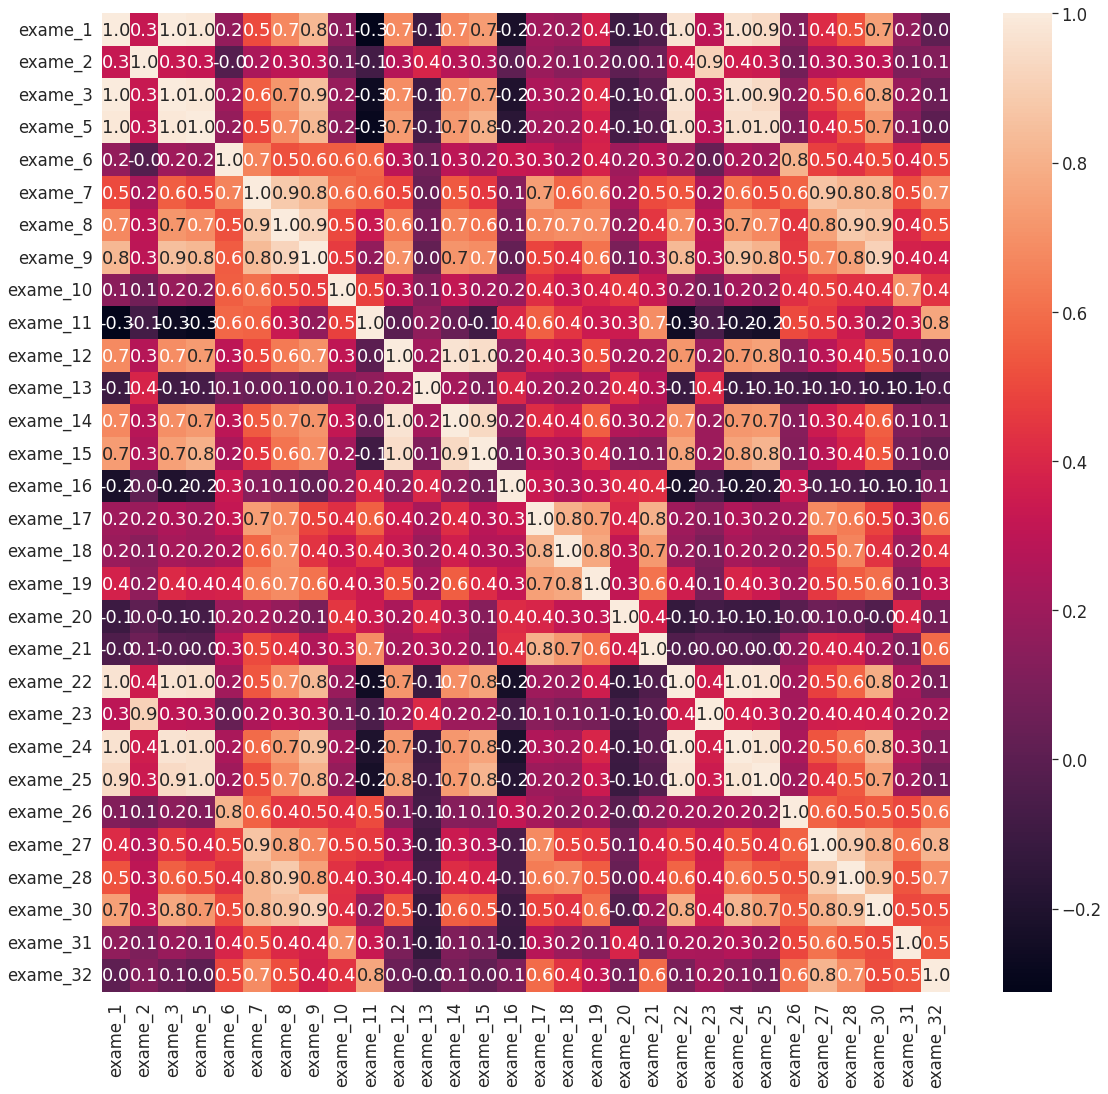

In [427]:
correlacao = valores_exames_v3.corr() # Correlação

plt.figure(figsize=  (19,18))
sns.heatmap(correlacao, annot = True, fmt = '.1f')

# annot = True ---> coloca o numero em cada quadrado

In [428]:
correlacao2 = correlacao[correlacao>0.99]
correlacao2.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [429]:
correlacao2 = correlacao2.sum()
correlacao2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [430]:
correlacionadas = correlacao2[correlacao2>1]
correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

### Essas variaveis correlacionadas vamos excluir da nossa analise


In [431]:
valores_exames_v4 = valores_exames_v3.drop(columns = correlacionadas.keys())
valores_exames_v4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [432]:
# Ver o resultado da acuracia agora

classificar(valores_exames_v4)

Resultado da Classificação 94.15%


In [433]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])

classificar(valores_exames_v5)

Resultado da Classificação 95.91%


In [434]:
valores_exames_v6 = valores_exames_v1.drop(columns = ['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [435]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selecionar_kmelhores = SelectKBest(chi2, k = 7) # Qual feature é mais importante pra nosso processo

# # k = 5 ou seja A PESSOA PRECISA REALISAR APENAS 5 EXAMES


# treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3, random_state=101)

# selecionar_kmelhores.fit(treino_x, treino_y)

# treino_kbest = selecionar_kmelhores.transform(treino_x)
# test_kbest = selecionar_kmelhores.transfom(teste_x)

# chi2 não aceita valores negativos

In [436]:
selecionar_kmelhores = SelectKBest(chi2, k = 5) # Qual feature é mais importante pra nosso processo

# k = 5 ou seja A PESSOA PRECISA REALISAR APENAS 5 EXAMES


treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3, random_state=1234)

selecionar_kmelhores.fit(treino_x, treino_y)


treino_kbest = selecionar_kmelhores.transform(treino_x)
test_kbest = selecionar_kmelhores.transform(teste_x)

In [437]:
print(treino_kbest.shape)
print(test_kbest.shape)

(398, 5)
(171, 5)


In [438]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)

print('Resultado da Classificação boba %.2f%%' %(classificador.score(test_kbest, teste_y)*100))

Resultado da Classificação boba 92.40%


In [439]:
5/33 # ficamos com 15% das features, reduzimos nosso banco de dados em 85%, 
# um exemplo ---> nós reduzimos o custo dos exames em caso do exames terem o mesmo custo em 85% 

0.15151515151515152

In [440]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(test_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(58.5, 0.5, 'Real'), Text(0.5, 40.5, 'Predição')]

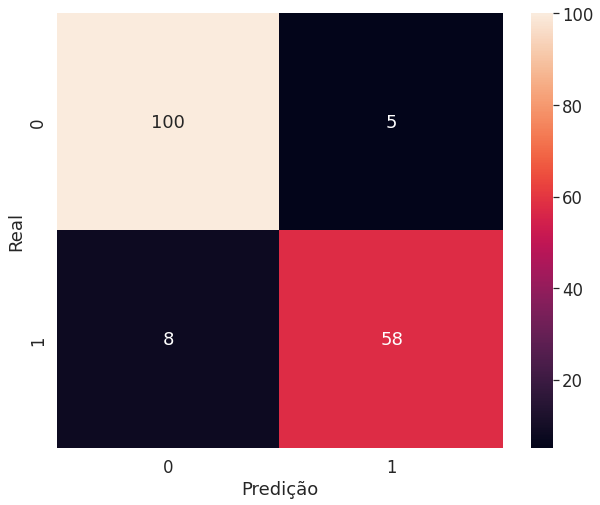

In [441]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [442]:
## Interpretando o grafico 

# Exemplos 
# 1 = cancer M = temos 66 
# 0 = cancer B = temos 105

# 1 --> de 66 casos eu acerto 58

# 1 --> 0 =  e 8 NÃO SENDO O TIPO DE CANCER M

Resultado da Classificação boba 90.06%


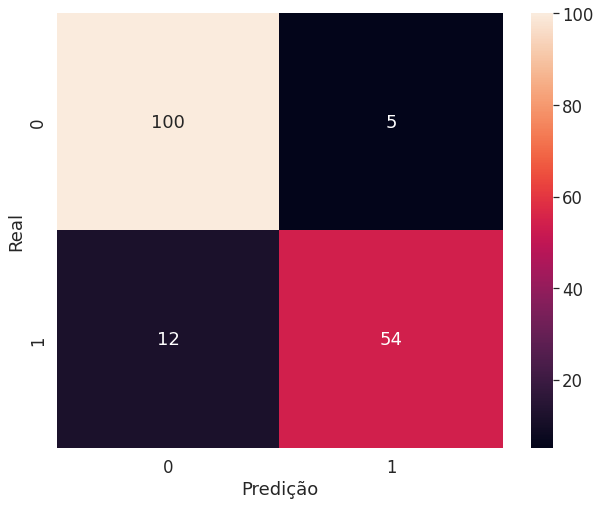

In [443]:
from sklearn.feature_selection import RFE

# Separar treino de teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3, random_state=1234)


# Selecioando o modelo
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select=5, step = 1) # step = 1 passo
selecionador_rfe.fit(treino_x, treino_y)

# Transformando os dados
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

# Treinando os novos treinos
classificador.fit(treino_rfe, treino_y)


# selecionando a matrix de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')


# Aqui o resultado
print('Resultado da Classificação boba %.2f%%' %(classificador.score(teste_rfe, teste_y)*100))

## Aqui foi um resultado melhor do que os outros

Resultado da Classificação 92.98%


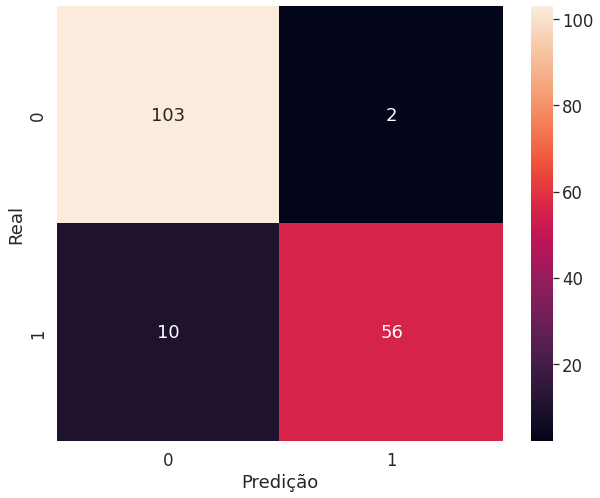

In [444]:
from sklearn.feature_selection import RFECV


# Separar treino de teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3, random_state=1234)


# Selecioando o modelo
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

                                                                        #  uma função de avaliação, ele avalia através da acuracia
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy') # step = 1 passo  cv = a divisão que quero
selecionador_rfecv.fit(treino_x, treino_y)


# Transformando os dados
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

# Treinando os novos treinos
classificador.fit(treino_rfecv, treino_y)


# selecionando a matrix de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')


# Aqui o resultado
print('Resultado da Classificação %.2f%%' %(classificador.score(teste_rfecv, teste_y)*100))

# Quantas features eu preciso para ter o melhor resultado

In [445]:
selecionador_rfecv.n_features_ 
# Olha eu preciso de 26 features para ter o melhor resultado possivel

26

## Qual feature impacta nosso modelo ?

In [446]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

## Mostra a acuracia das variaveis ?


In [447]:
len(selecionador_rfecv.grid_scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


28

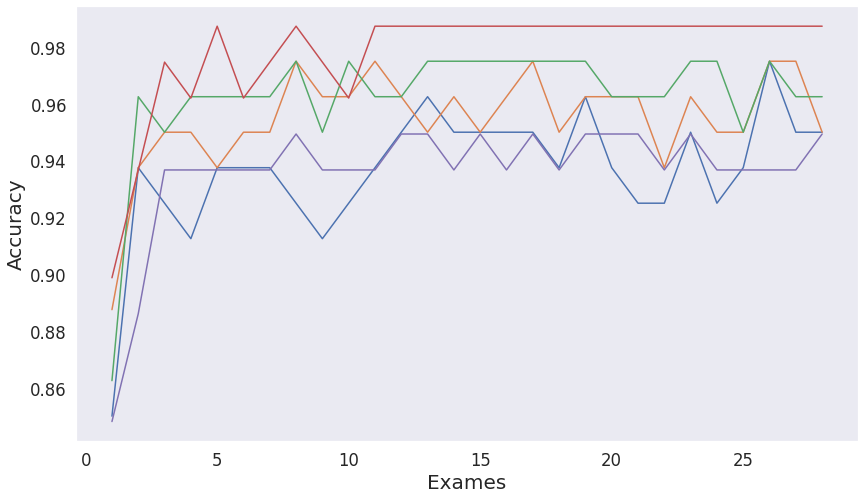

In [448]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel('Exames', fontsize = 20)
plt.ylabel('Accuracy', fontsize =20)

# vai colocar aqueles quadradinhos no fundo da nossa imagem 
plt.grid()

plt.plot(range(1, len(selecionador_rfecv.grid_scores_) +1), selecionador_rfecv.grid_scores_)

plt.show()









Resultado da Classificação boba 87.13%


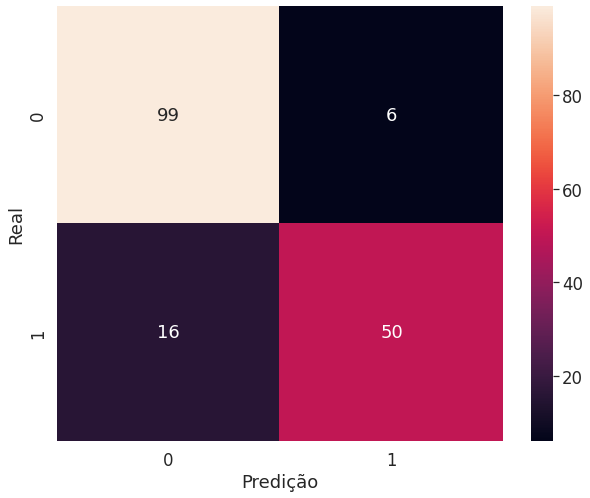

In [449]:
from sklearn.feature_selection import RFE

# Separar treino de teste
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3, random_state=1234)


# Selecioando o modelo
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select=2, step = 1) # step = 1 passo
selecionador_rfe.fit(treino_x, treino_y)

# Transformando os dados
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

# Treinando os novos treinos
classificador.fit(treino_rfe, treino_y)


# selecionando a matrix de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')


# Aqui o resultado
print('Resultado da Classificação boba %.2f%%' %(classificador.score(teste_rfe, teste_y)*100))

In [450]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

valores_exames_v7.shape

(569, 2)

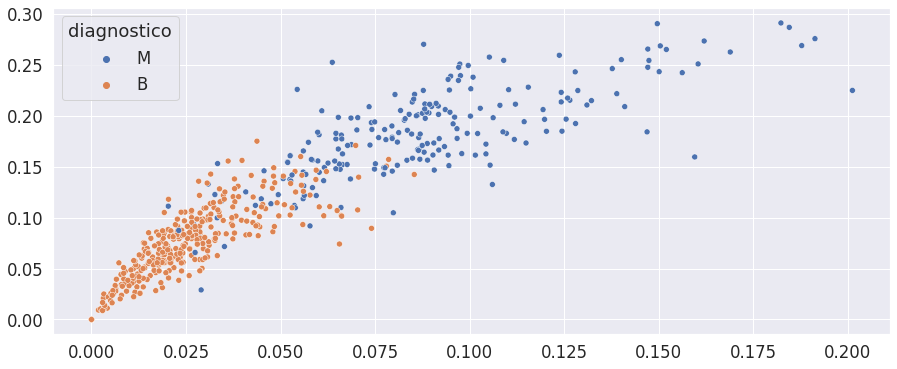

In [451]:
import seaborn as sns

plt.figure(figsize = (15,6))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue=diagnostico)

In [452]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

valores_exames_v8 = pca.fit_transform(valores_exames_v5)
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

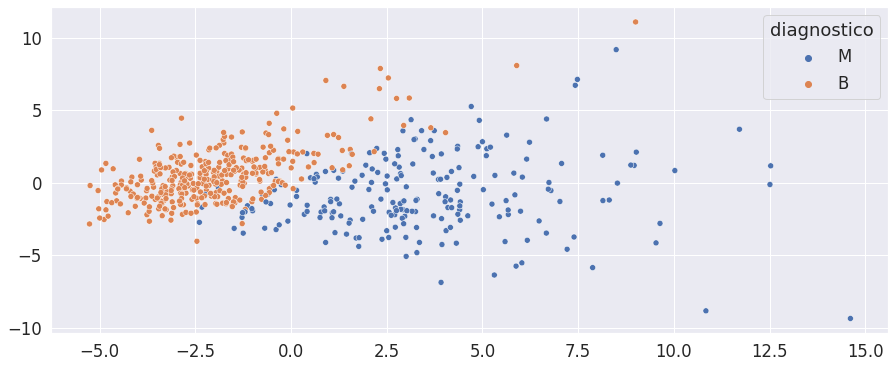

In [453]:
plt.figure(figsize = (15,6))

sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue=diagnostico)

In [454]:
valores_exames_v5.shape

(569, 28)